# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [4]:
# This was created using 17 different campaigns
print(17)

17


### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [23]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score



In [6]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [7]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
# Count total number of rows
total_rows = df.shape[0]
print(total_rows)

41188


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [9]:
# Loop through the columns and check for null values
for column in df.columns:
    null_count = df[column].isnull().sum()
    if null_count > 0:
        print(f"Column '{column}' has {null_count} null values.")

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [11]:
# Calculate the percentage of 'yes' and 'no' in df['y']
percentages = df['y'].value_counts(normalize=True) * 100
print(percentages)

y
no     88.734583
yes    11.265417
Name: proportion, dtype: float64


### Business Objective
The purpose of this data is to properly be able to determine who will subscribe to a term deposit deal and what are the biggest levers in making that decision.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [12]:
def encode(df):
    # Encode the target column 'y'
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(df['y'])
    X = df.drop(columns=['y'], axis=1)

    # Encode all categorical columns
    categorical_columns = X.select_dtypes(include=['object']).columns
    numerical_columns = X.select_dtypes(include=['number']).columns

    # Encode categorical columns
    X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

    # Encode numerical columns
    scaler = StandardScaler()
    X[numerical_columns] = scaler.fit_transform(X[numerical_columns])
    return X, y

X, y = encode(df)

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [14]:
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)
baseline_acc = accuracy_score(y_test, dummy_pred)

print(f"Baseline Accuracy: {baseline_acc:.4f}")

Baseline Accuracy: 0.8876


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [15]:
start_time = time.time()
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_train_time = time.time() - start_time
print(f"Training time: {lr_train_time:.4f} seconds")

Training time: 0.1854 seconds


### Problem 9: Score the Model

What is the accuracy of your model?

In [16]:
lr_pred = lr.predict(X_test)
lr_acc_test = accuracy_score(y_test, lr_pred)
lr_acc_train = accuracy_score(y_train, lr.predict(X_train))
print(f"Logistic Regression Accuracy: {lr_acc_test:.4f}")
print(f"Logistic Regression Accuracy (train): {lr_acc_train:.4f}")

Logistic Regression Accuracy: 0.9124
Logistic Regression Accuracy (train): 0.9118


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [17]:
start_time = time.time()
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_train_time = time.time() - start_time
print(f"Training time: {knn_train_time:.4f} seconds")

knn_pred = knn.predict(X_test)
knn_acc_test = accuracy_score(y_test, knn_pred)
knn_acc_train = accuracy_score(y_train, knn.predict(X_train))
print(f"KNN Accuracy: {knn_acc_test:.4f}")
print(f"KNN Accuracy (train): {knn_acc_train:.4f}")

Training time: 0.0213 seconds
KNN Accuracy: 0.9026
KNN Accuracy (train): 0.9295


In [18]:
start_time = time.time()
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_train_time = time.time() - start_time
print(f"Training time: {dt_train_time:.4f} seconds")

dt_pred = dt.predict(X_test)
dt_acc_test = accuracy_score(y_test, dt_pred)
dt_acc_train = accuracy_score(y_train, dt.predict(X_train))
print(f"Decision Tree Accuracy: {dt_acc_test:.4f}")
print(f"Decision Tree Accuracy (train): {dt_acc_train:.4f}")

Training time: 0.1179 seconds
Decision Tree Accuracy: 0.8894
Decision Tree Accuracy (train): 1.0000


In [19]:
start_time = time.time()
svc = SVC()
svc.fit(X_train, y_train)
svc_train_time = time.time() - start_time
print(f"Training time: {svc_train_time:.4f} seconds")

svc_pred = svc.predict(X_test)
svc_acc_test = accuracy_score(y_test, svc_pred)
svc_acc_train = accuracy_score(y_train, svc.predict(X_train))
print(f"SVC Accuracy: {svc_acc_test:.4f}")
print(f"SVC Accuracy (train): {svc_acc_train:.4f}")

Training time: 6.6114 seconds
SVC Accuracy: 0.9113
SVC Accuracy (train): 0.9221


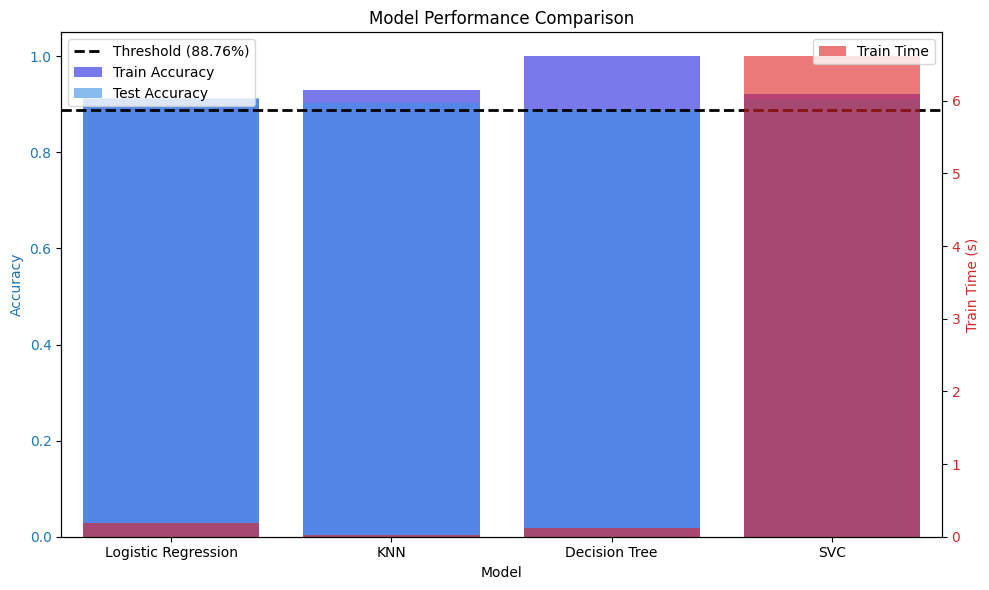

<Figure size 640x480 with 0 Axes>

In [29]:
# Create a DataFrame to store the results
results = pd.DataFrame({
    "Model": ["Logistic Regression", "KNN", "Decision Tree", "SVC"],
    "Train Time (s)": [lr_train_time, knn_train_time, dt_train_time, svc_train_time],
    "Train Accuracy": [lr_acc_train, knn_acc_train, dt_acc_train, svc_acc_train],
    "Test Accuracy": [lr_acc_test, knn_acc_test, dt_acc_test, svc_acc_test]
})

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Accuracy (Train & Test) on left y-axis
ax1.set_title("Model Performance Comparison")
ax1.set_xlabel("Model")
ax1.set_ylabel("Accuracy", color="tab:blue")
sns.barplot(data=results, x="Model", y="Train Accuracy", color="blue", alpha=0.6, label="Train Accuracy", ax=ax1)
sns.barplot(data=results, x="Model", y="Test Accuracy", color="dodgerblue", alpha=0.6, label="Test Accuracy", ax=ax1)
ax1.tick_params(axis="y", labelcolor="tab:blue")

# Add threshold line for accuracy at 88.76%
ax1.axhline(y=88.76 / 100, color="black", linestyle="--", linewidth=2, label="Threshold (88.76%)")

# Create second y-axis for Train Time
ax2 = ax1.twinx()
ax2.set_ylabel("Train Time (s)", color="tab:red")
sns.barplot(data=results, x="Model", y="Train Time (s)", color="red", alpha=0.6, label="Train Time", ax=ax2)
ax2.tick_params(axis="y", labelcolor="tab:red")

# Legends
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('./images/initial_model_performance_comparison.png')

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [162]:
# Group by marital status and calculate the percentage of 'yes' and 'no' for each group
marital_status_percentages = df.groupby('marital')['y'].value_counts(normalize=True).unstack() * 100
print(marital_status_percentages)

y                no        yes
marital                       
divorced  89.679098  10.320902
married   89.842747  10.157253
single    85.995851  14.004149
unknown   85.000000  15.000000


In [163]:
# Combine together single and unknown values and married/divorced values
# to create a new category called 'single/unknown' and 'married/divorced'
df['marital'] = df['marital'].replace(['single', 'unknown'], 'single/unknown')
df['marital'] = df['marital'].replace(['married', 'divorced'], 'married/divorced')

In [164]:
education_percentages = df.groupby('education')['y'].value_counts(normalize=True).unstack() * 100
print(education_percentages)

y                           no        yes
education                                
basic.4y             89.750958  10.249042
basic.6y             91.797557   8.202443
basic.9y             92.175352   7.824648
high.school          89.164477  10.835523
illiterate           77.777778  22.222222
professional.course  88.651535  11.348465
university.degree    86.275477  13.724523
unknown              85.499711  14.500289


In [165]:
poutcome_percentages = df.groupby('poutcome')['y'].value_counts(normalize=True).unstack() * 100
print(poutcome_percentages)

y                   no        yes
poutcome                         
failure      85.771402  14.228598
nonexistent  91.167787   8.832213
success      34.887109  65.112891


In [166]:
month_percentages = df.groupby('month')['y'].value_counts(normalize=True).unstack() * 100
print(month_percentages)

y             no        yes
month                      
apr    79.521277  20.478723
aug    89.397863  10.602137
dec    51.098901  48.901099
jul    90.953443   9.046557
jun    89.488530  10.511470
mar    49.450549  50.549451
may    93.565255   6.434745
nov    89.856133  10.143867
oct    56.128134  43.871866
sep    55.087719  44.912281


In [167]:
day_percentages = df.groupby('day_of_week')['y'].value_counts(normalize=True).unstack() * 100
print(day_percentages)

y                   no        yes
day_of_week                      
fri          89.191261  10.808739
mon          90.051680   9.948320
thu          87.881248  12.118752
tue          88.220025  11.779975
wed          88.332924  11.667076


In [168]:
# Remove the days of the week columns
df = df.drop(columns=['day_of_week'], axis=1)

In [170]:
X, y = encode(df)

In [30]:
start_time = time.time()
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_train_time = time.time() - start_time
print(f"Training time: {lr_train_time:.4f} seconds")

lr_pred = lr.predict(X_test)
lr_acc_test = accuracy_score(y_test, lr_pred)
lr_acc_train = accuracy_score(y_train, lr.predict(X_train))
print(f"Logistic Regression Accuracy: {lr_acc_test:.4f}")
print(f"Logistic Regression Accuracy (train): {lr_acc_train:.4f}")

Training time: 0.2413 seconds
Logistic Regression Accuracy: 0.9124
Logistic Regression Accuracy (train): 0.9118


In [171]:
params = {'n_neighbors': [2, 5, 10, 12, 15]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)


{'n_neighbors': 15}
0.9061082163933311


In [140]:
params = { 'max_depth': [2, 5, 10, 15, 20]}
dt = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=dt, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 5}
0.914363217322283


In [141]:
# Go through the different models of SVC
params = { 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
svc = SVC()
grid_search = GridSearchCV(estimator=svc, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

{'kernel': 'rbf'}
0.9108946503365971


### Outcome
The reason why we want to check a few different features is to see if there are any that we can get rid of that may not have a large impact to the data and in turn speed up and give us better results. For instance, gender gave the exact same percentages for acceptance so that allowed us to be able to decipher that it didn't have a large impact on whether someone agreed to doing the loan.

##### Questions